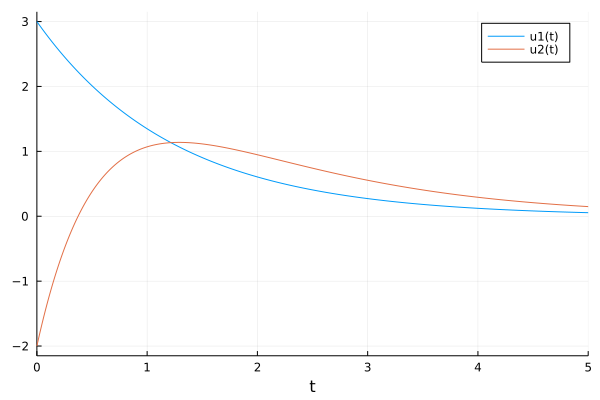

In [1]:
using DataDrivenDiffEq
using OrdinaryDiffEq
using LinearAlgebra
using ModelingToolkit
using Plots

function slow_manifold(du, u, p, t)
    du[1] = p[1] * u[1]
    du[2] = p[2] * (u[2] - u[1]^2)
end

u0 = [3.0; -2.0]
tspan = (0.0, 5.0)
p = [-0.8; -0.7]

problem = ODEProblem(slow_manifold, u0, tspan, p)
solution = solve(problem, Tsit5(), saveat = 0.01)
plot(solution)

In [2]:
prob = ContinuousDataDrivenProblem(solution)

Continuous DataDrivenProblem{Float64} ##DDProblem#258 in 2 dimensions and 501 samples

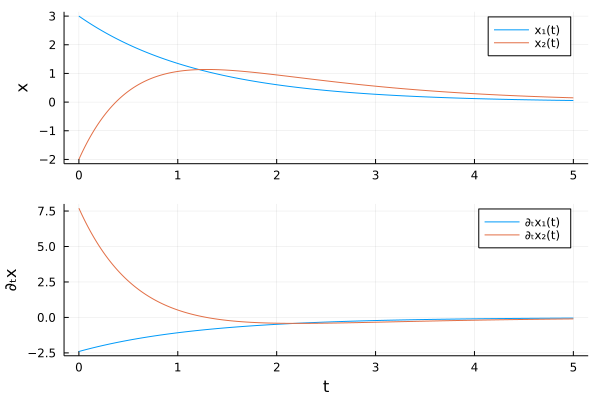

In [3]:
plot(prob)

In [46]:
@parameters t
@variables u[1:2](t)

Ψ = Basis([u;], u, independent_variable = t)
res = solve(prob, Ψ, DMDPINV(), digits = 1)
res.out.k[1][1]

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.6824515331330337
  0.0
vectors:
2×2 Matrix{Float64}:
 0.707107  0.883937
 0.707107  0.467605